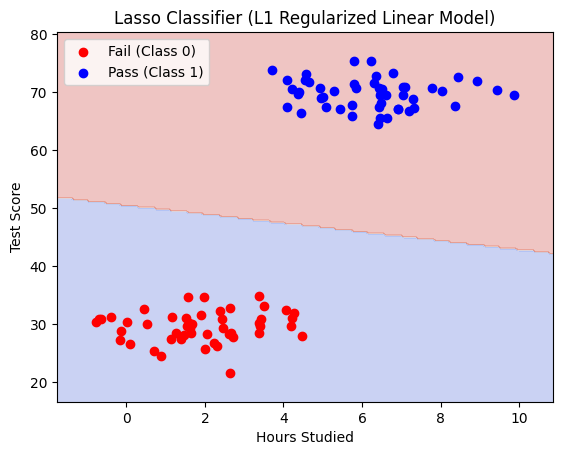

Coefficients: [[0.13263684 0.17366317]]
Intercept: [-8.76694484]


In [8]:
# Step 1: Import libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

# Step 2: Create dataset
np.random.seed(42)
# Class 0: Fail
X0 = np.random.multivariate_normal([2, 30], [[2, 0.5], [0.5, 10]], 50)
# Class 1: Pass
X1 = np.random.multivariate_normal([6, 70], [[2, -0.5], [-0.5, 8]], 50)

X = np.vstack((X0, X1))
y = np.array([0]*50 + [1]*50)

# Step 3: Train Lasso Classifier (Logistic Regression with L1 penalty)
lasso_clf = LogisticRegression(penalty="l1", solver="liblinear", C=1.0)
lasso_clf.fit(X, y)

# Step 4: Predict decision regions
x_min, x_max = X[:,0].min()-1, X[:,0].max()+1
y_min, y_max = X[:,1].min()-5, X[:,1].max()+5
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                     np.linspace(y_min, y_max, 200))
Z = lasso_clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Step 5: Plot decision boundary
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
plt.scatter(X0[:,0], X0[:,1], color="red", label="Fail (Class 0)")
plt.scatter(X1[:,0], X1[:,1], color="blue", label="Pass (Class 1)")

plt.xlabel("Hours Studied")
plt.ylabel("Test Score")
plt.title("Lasso Classifier (L1 Regularized Linear Model)")
plt.legend()
plt.show()

# Step 6: Print coefficients (to show feature selection effect)
print("Coefficients:", lasso_clf.coef_)
print("Intercept:", lasso_clf.intercept_)
